=== Фронт Парето (x, y, f1, f2) ===
x = -6.4089, y = 8.2932, f1 = 7.5953, f2 = -6.3955
x = -6.8751, y = 8.4430, f1 = 8.1457, f2 = -6.6884
x = -6.0191, y = 7.9803, f1 = 7.0846, f2 = -6.0176
x = -2.1082, y = 5.9344, f1 = 3.3091, f2 = 1.2268
x = -4.9454, y = 6.9160, f1 = 5.9454, f2 = -4.9445
x = 0.7964, y = 6.5529, f1 = 0.2853, f2 = 29.4114
x = -0.2744, y = 6.1290, f1 = 1.4831, f2 = 14.5837
x = -6.3745, y = 8.1611, f1 = 7.4968, f2 = -6.3290
x = -3.8715, y = 6.0218, f1 = 4.9645, f2 = -3.8488
x = -3.3002, y = 5.8338, f1 = 4.5101, f2 = -3.0154
x = -4.8314, y = 6.7614, f1 = 5.8317, f2 = -4.8265
x = -0.2838, y = 6.1887, f1 = 1.4427, f2 = 14.9649
x = -3.2651, y = 6.0375, f1 = 4.3646, f2 = -2.6685
x = 0.1266, y = 6.1605, f1 = 1.1222, f2 = 18.5064
x = -0.2407, y = 6.1301, f1 = 1.4533, f2 = 14.8868
x = -7.2363, y = 8.8424, f1 = 8.9084, f2 = -7.0812
x = -2.0680, y = 5.9309, f1 = 3.2740, f2 = 1.4023
x = -2.2251, y = 5.9819, f1 = 3.3876, f2 = 0.8612
x = -8.3825, y = 9.9405, f1 = 12.7592, f2 = -8.1872

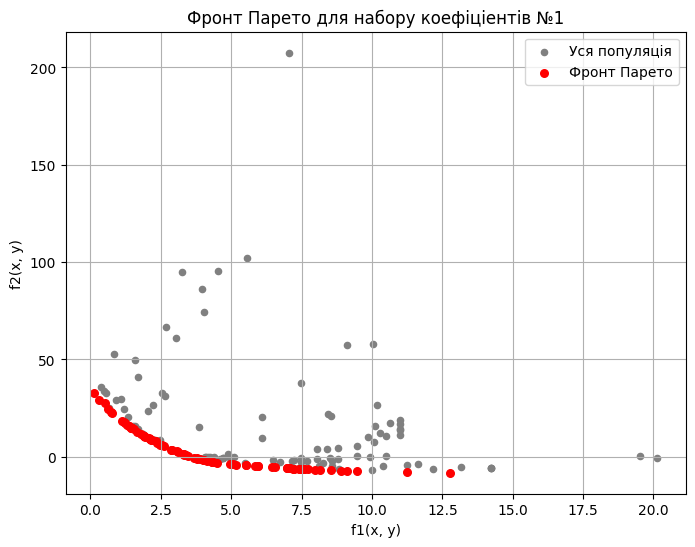

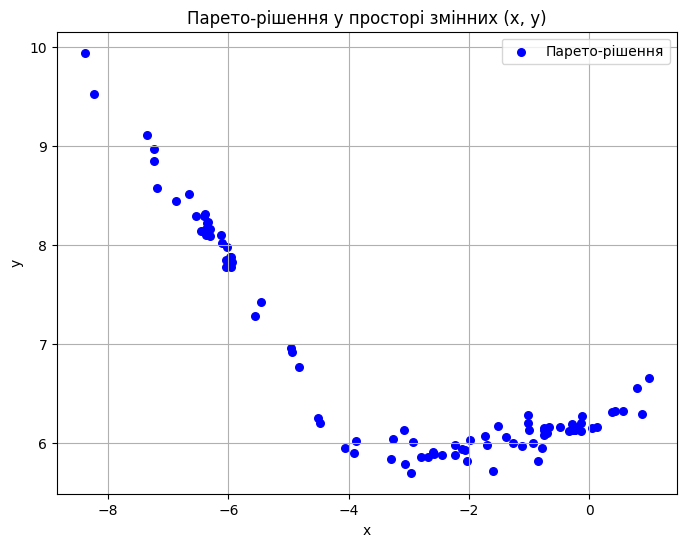

In [1]:
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
import pandas as pd
import os


# === Цільові функції для багатокритеріальної оптимізації (варіант 36) ===

def f1(x, y):
    # f1 = sqrt((x - 1)^2 + (y - 7)^4)
    return np.sqrt((x - 1)**2 + (y - 7)**4)

def f2(x, y):
    # f2 = (x + y - 2)^2 + x
    return (x + y - 2)**2 + x

# === Параметри алгоритму ===

gen = 40                    # Кількість поколінь
pop_size = 200              # Розмір популяції
crossover_rate = 0.7        # Ймовірність кросоверу
mutation_rate = 0.1         # Ймовірність мутації
selection_rate = 0.2        # Частка еліти (кращих рішень)

# === Генерація початкової популяції ===

def generate_population(size, lower, upper):
    return [[random.uniform(lower, upper), random.uniform(lower, upper)] for _ in range(size)]

# === Парето-домінування ===

def dominates(a, b):
    # Повертає True, якщо a Парето-домінує b
    return all(x <= y for x, y in zip(a, b)) and any(x < y for x, y in zip(a, b))

# === Оцінка популяції: обчислення f1, f2 + Парето-фітнес ===

def evaluate_population(pop):
    fitness = [0] * len(pop)
    objectives = [(f1(ind[0], ind[1]), f2(ind[0], ind[1])) for ind in pop]
    for i in range(len(pop)):
        for j in range(len(pop)):
            if i != j and dominates(objectives[j], objectives[i]):
                fitness[i] += 1
    return fitness, objectives

# === Кросовер (лінійна комбінація) ===

def crossover(p1, p2, lower=-10, upper=10):
    beta1, beta2 = random.uniform(-1, 1), random.uniform(-1, 1)
    child_x = beta1 * p1[0] + (1 - beta1) * p2[0]
    child_y = beta2 * p1[1] + (1 - beta2) * p2[1]
    child_x = np.clip(child_x, lower, upper)
    child_y = np.clip(child_y, lower, upper)
    return [child_x, child_y]

# === Мутація (додавання шуму) ===

def mutate(p, lower, upper):
    p_mut = p.copy()
    p_mut[0] += np.random.normal(0, (upper - lower) / 6)
    p_mut[1] += np.random.normal(0, (upper - lower) / 6)
    # Обмеження межами області пошуку
    p_mut[0] = np.clip(p_mut[0], lower, upper)
    p_mut[1] = np.clip(p_mut[1], lower, upper)
    return p_mut

# === Основний алгоритм ===

def multiobjective_genetic_algorithm(lower, upper):
    population = generate_population(pop_size, lower, upper)

    for gen_num in range(gen):
        fitness, objectives = evaluate_population(population)
        
        # Відбір еліти
        elite_count = int(pop_size * selection_rate)
        elite_indices = np.argsort(fitness)[:elite_count]
        elite = [population[i] for i in elite_indices]

        new_population = copy.deepcopy(elite)

        # Кросовер
        while len(new_population) < pop_size * (1 - mutation_rate):
            p1, p2 = random.sample(elite, 2)
            child = crossover(p1, p2)
            new_population.append(child)

        # Мутація
        while len(new_population) < pop_size:
            ind = random.choice(elite)
            new_population.append(mutate(ind, lower, upper))

        population = new_population

    # Фінальна оцінка і побудова фронту Парето
    fitness, objectives = evaluate_population(population)
    pareto_front = [objectives[i] for i in range(len(fitness)) if fitness[i] == 0]
    return population, pareto_front, objectives


# === Запуск ===

population1, pareto1, all_objs1 = multiobjective_genetic_algorithm(-10, 10)

# Фінальна оцінка і побудова фронту Парето
fitness1, objectives1 = evaluate_population(population1)

# Збираємо точки фронту Парето
pareto_front1 = []
pareto_coords1 = []

for i in range(len(fitness1)):
    if fitness1[i] == 0:
        pareto_front1.append(objectives1[i])       # (f1, f2)
        pareto_coords1.append(population1[i])      # (x, y)

# === Вивід точок фронту Парето: x, y, f1, f2 ===
print("=== Фронт Парето (x, y, f1, f2) ===")
for (x, y), (f1_val, f2_val) in zip(pareto_coords1, pareto_front1):
    print(f"x = {x:.4f}, y = {y:.4f}, f1 = {f1_val:.4f}, f2 = {f2_val:.4f}")

# === Формування таблиці з результатами фронту Парето ===
pareto_table1 = {
    "x": [x for x, y in pareto_coords1],
    "y": [y for x, y in pareto_coords1],
    "f1": [f1_val for f1_val, f2_val in pareto_front1],
    "f2": [f2_val for f1_val, f2_val in pareto_front1]
}

# === Створення DataFrame і збереження у файл Excel ===
df_pareto = pd.DataFrame(pareto_table1)
file_path = os.path.abspath("rez1.xlsx")
df_pareto.to_excel(file_path, index=False)
print(f"\nФайл збережено за шляхом: {file_path}")


# Візуалізація фронту Парето
pareto_front1 = np.array(pareto_front1)
all_objs1 = np.array(objectives1)

plt.figure(figsize=(8, 6))
plt.scatter(all_objs1[:, 0], all_objs1[:, 1], c='gray', s=20, label='Уся популяція')
plt.scatter(pareto_front1[:, 0], pareto_front1[:, 1], c='red', s=30, label='Фронт Парето')
plt.xlabel("f1(x, y)")
plt.ylabel("f2(x, y)")
plt.title("Фронт Парето для набору коефіціентів №1")
plt.legend()
plt.grid(True)
plt.show()
# Візуалізація Парето-рішень у просторі змінних (x, y) — без підписів
pareto_coords1 = np.array(pareto_coords1)

plt.figure(figsize=(8, 6))
plt.scatter(pareto_coords1[:, 0], pareto_coords1[:, 1], c='blue', s=30, label='Парето-рішення')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Парето-рішення у просторі змінних (x, y)")
plt.legend()
plt.grid(True)
plt.show()



=== Фронт Парето (x, y, f1, f2) ===
x = 0.6572, y = 6.4651, f1 = 0.4465, f2 = 26.8953
x = -6.0315, y = 7.9463, f1 = 7.0883, f2 = -6.0242
x = -2.3030, y = 6.0060, f1 = 3.4476, f2 = 0.5970
x = 0.5960, y = 6.3617, f1 = 0.5738, f2 = 25.1750
x = -4.8994, y = 6.7872, f1 = 5.8996, f2 = -4.8868
x = -2.8329, y = 5.8854, f1 = 4.0292, f2 = -1.7251
x = -2.9696, y = 5.8852, f1 = 4.1596, f2 = -2.1313
x = -2.9497, y = 5.9425, f1 = 4.1049, f2 = -1.9639
x = -2.7030, y = 5.9593, f1 = 3.8582, f2 = -1.1249
x = -0.1400, y = 6.2492, f1 = 1.2718, f2 = 16.7450
x = -4.1246, y = 6.3146, f1 = 5.1461, f2 = -4.0885
x = -0.7528, y = 5.9995, f1 = 2.0186, f2 = 9.7877
x = 0.8841, y = 6.6398, f1 = 0.1740, f2 = 31.3978
x = -6.3470, y = 8.2307, f1 = 7.5015, f2 = -6.3335
x = -2.8937, y = 5.9471, f1 = 4.0485, f2 = -1.7841
x = -1.3529, y = 5.9468, f1 = 2.6013, f2 = 5.3753
x = -1.9766, y = 5.9855, f1 = 3.1494, f2 = 2.0594
x = -3.7769, y = 5.9585, f1 = 4.8986, f2 = -3.7440
x = -1.7448, y = 5.9862, f1 = 2.9309, f2 = 3.2793
x =

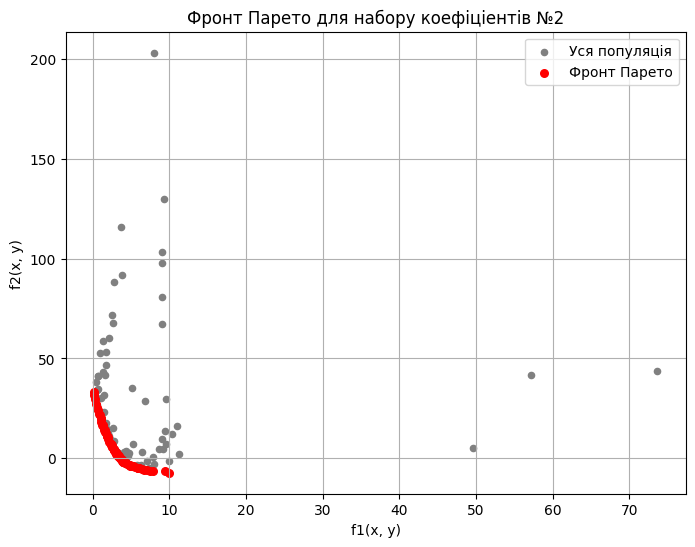

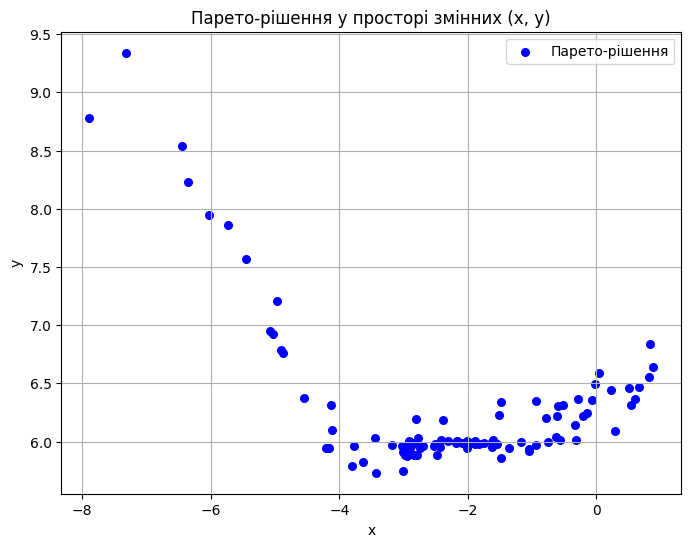

In [2]:
fitness2=[]
objectives2=[]
crossover_rate = 0.8        # Ймовірність кросоверу
mutation_rate = 0.1         # Ймовірність мутації
selection_rate = 0.1 
population2, pareto2, all_objs2 = multiobjective_genetic_algorithm(-10, 10)

# Фінальна оцінка і побудова фронту Парето
fitness2, objectives2 = evaluate_population(population2)

# Збираємо точки фронту Парето
pareto_front2 = []
pareto_coords2 = []

for i in range(len(fitness2)):
    if fitness2[i] == 0:
        pareto_front2.append(objectives2[i])       # (f1, f2)
        pareto_coords2.append(population2[i])      # (x, y)

# === Вивід точок фронту Парето: x, y, f1, f2 ===
print("=== Фронт Парето (x, y, f1, f2) ===")
for (x, y), (f1_val, f2_val) in zip(pareto_coords2, pareto_front2):
    print(f"x = {x:.4f}, y = {y:.4f}, f1 = {f1_val:.4f}, f2 = {f2_val:.4f}")

# === Формування таблиці з результатами фронту Парето ===
pareto_table2 = {
    "x": [x for x, y in pareto_coords2],
    "y": [y for x, y in pareto_coords2],
    "f1": [f1_val for f1_val, f2_val in pareto_front2],
    "f2": [f2_val for f1_val, f2_val in pareto_front2]
}

# === Створення DataFrame і збереження у файл Excel ===
df_pareto = pd.DataFrame(pareto_table2)
file_path = os.path.abspath("rez2.xlsx")
df_pareto.to_excel(file_path, index=False)
print(f"\nФайл збережено за шляхом: {file_path}")



# Візуалізація фронту Парето
pareto_front2 = np.array(pareto_front2)
all_objs2 = np.array(objectives2)

plt.figure(figsize=(8, 6))
plt.scatter(all_objs2[:, 0], all_objs2[:, 1], c='gray', s=20, label='Уся популяція')
plt.scatter(pareto_front2[:, 0], pareto_front2[:, 1], c='red', s=30, label='Фронт Парето')
plt.xlabel("f1(x, y)")
plt.ylabel("f2(x, y)")
plt.title("Фронт Парето для набору коефіціентів №2")
plt.legend()
plt.grid(True)
plt.show()
# Візуалізація Парето-рішень у просторі змінних (x, y) — без підписів
pareto_coords2 = np.array(pareto_coords2)

plt.figure(figsize=(8, 6))
plt.scatter(pareto_coords2[:, 0], pareto_coords2[:, 1], c='blue', s=30, label='Парето-рішення')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Парето-рішення у просторі змінних (x, y)")
plt.legend()
plt.grid(True)
plt.show()

=== Фронт Парето (x, y, f1, f2) ===
x = -7.1500, y = 8.6051, f1 = 8.5476, f2 = -6.8531
x = -4.7099, y = 6.7012, f1 = 5.7106, f2 = -4.7099
x = -0.4980, y = 6.1347, f1 = 1.6747, f2 = 12.7274
x = -2.2146, y = 5.8690, f1 = 3.4598, f2 = 0.5222
x = -1.9180, y = 5.9529, f1 = 3.1172, f2 = 2.2229
x = -1.7680, y = 6.0446, f1 = 2.9146, f2 = 3.4152
x = -0.3699, y = 6.0433, f1 = 1.6475, f2 = 13.1241
x = -4.6472, y = 6.7755, f1 = 5.6474, f2 = -4.6307
x = -0.9786, y = 6.1117, f1 = 2.1301, f2 = 8.8382
x = -8.2750, y = 10.0000, f1 = 12.9238, f2 = -8.1994
x = -3.7728, y = 5.9819, f1 = 4.8841, f2 = -3.7291
x = -0.6008, y = 6.1013, f1 = 1.7930, f2 = 11.6527
x = -3.2944, y = 6.0876, f1 = 4.3744, f2 = -2.6653
x = -0.9033, y = 6.0369, f1 = 2.1173, f2 = 8.9161
x = 0.7989, y = 6.6096, f1 = 0.2523, f2 = 30.0505
x = -5.9964, y = 7.8026, f1 = 7.0260, f2 = -5.9589
x = -2.5561, y = 6.0056, f1 = 3.6910, f2 = -0.4548
x = 0.4494, y = 6.2600, f1 = 0.7765, f2 = 22.6278
x = -4.7070, y = 6.7318, f1 = 5.7074, f2 = -4.7064


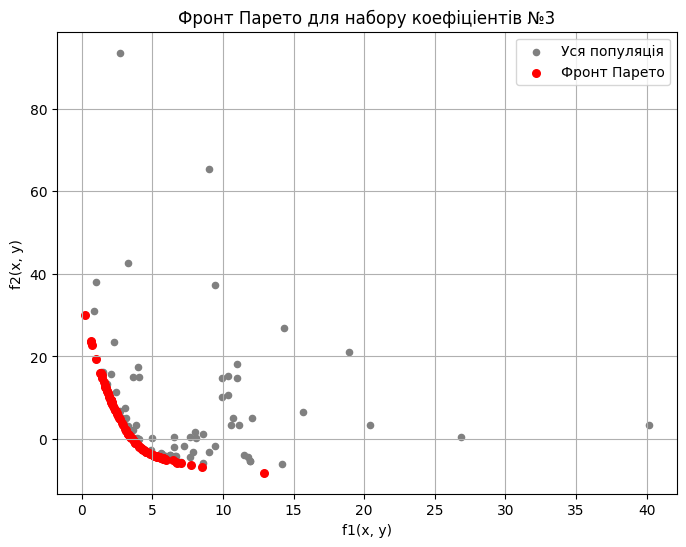

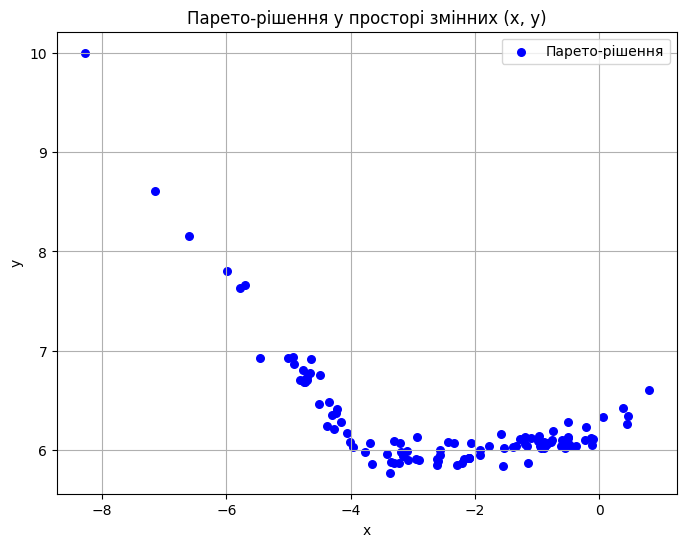

In [3]:
fitness3=[]
objectives3=[]
crossover_rate = 0.5        # Ймовірність кросоверу
mutation_rate = 0.2         # Ймовірність мутації
selection_rate = 0.3 
population3, pareto3, all_objs3 = multiobjective_genetic_algorithm(-10, 10)

# Фінальна оцінка і побудова фронту Парето
fitness3, objectives3 = evaluate_population(population3)

# Збираємо точки фронту Парето
pareto_front3 = []
pareto_coords3 = []

for i in range(len(fitness3)):
    if fitness3[i] == 0:
        pareto_front3.append(objectives3[i])       # (f1, f2)
        pareto_coords3.append(population3[i])      # (x, y)

# === Вивід точок фронту Парето: x, y, f1, f2 ===
print("=== Фронт Парето (x, y, f1, f2) ===")
for (x, y), (f1_val, f2_val) in zip(pareto_coords3, pareto_front3):
    print(f"x = {x:.4f}, y = {y:.4f}, f1 = {f1_val:.4f}, f2 = {f2_val:.4f}")

# === Формування таблиці з результатами фронту Парето ===
pareto_table3 = {
    "x": [x for x, y in pareto_coords3],
    "y": [y for x, y in pareto_coords3],
    "f1": [f1_val for f1_val, f2_val in pareto_front3],
    "f2": [f2_val for f1_val, f2_val in pareto_front3]
}

# === Створення DataFrame і збереження у файл Excel ===
df_pareto = pd.DataFrame(pareto_table3)
file_path = os.path.abspath("rez3.xlsx")
df_pareto.to_excel(file_path, index=False)
print(f"\nФайл збережено за шляхом: {file_path}")



# Візуалізація фронту Парето
pareto_front3 = np.array(pareto_front3)
all_objs3 = np.array(objectives3)

plt.figure(figsize=(8, 6))
plt.scatter(all_objs3[:, 0], all_objs3[:, 1], c='gray', s=20, label='Уся популяція')
plt.scatter(pareto_front3[:, 0], pareto_front3[:, 1], c='red', s=30, label='Фронт Парето')
plt.xlabel("f1(x, y)")
plt.ylabel("f2(x, y)")
plt.title("Фронт Парето для набору коефіціентів №3")
plt.legend()
plt.grid(True)
plt.show()
# Візуалізація Парето-рішень у просторі змінних (x, y) — без підписів
pareto_coords3 = np.array(pareto_coords3)

plt.figure(figsize=(8, 6))
plt.scatter(pareto_coords3[:, 0], pareto_coords3[:, 1], c='blue', s=30, label='Парето-рішення')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Парето-рішення у просторі змінних (x, y)")
plt.legend()
plt.grid(True)
plt.show()

=== Фронт Парето (x, y, f1, f2) ===
x = -7.6013, y = 8.8794, f1 = 9.2983, f2 = -7.0802
x = -7.6085, y = 9.2030, f1 = 9.8823, f2 = -7.4441
x = -0.5696, y = 6.0565, f1 = 1.8044, f2 = 11.5890
x = -1.3160, y = 5.9207, f1 = 2.5924, f2 = 5.4686
x = -1.9097, y = 5.9209, f1 = 3.1341, f2 = 2.1349
x = -4.2805, y = 6.2515, f1 = 5.3101, f2 = -4.2796
x = -4.2568, y = 6.3988, f1 = 5.2692, f2 = -4.2367
x = -0.8549, y = 6.1142, f1 = 2.0140, f2 = 9.7685
x = -1.5910, y = 5.9207, f1 = 2.8408, f2 = 3.8364
x = -3.5895, y = 6.0786, f1 = 4.6673, f2 = -3.3503
x = -1.2980, y = 5.9851, f1 = 2.5184, f2 = 5.9220
x = -3.8212, y = 6.1253, f1 = 4.8815, f2 = -3.7287
x = -1.6953, y = 5.9207, f1 = 2.9363, f2 = 3.2569
x = -1.2966, y = 6.0109, f1 = 2.4964, f2 = 6.0703
x = -2.6189, y = 5.9682, f1 = 3.7722, f2 = -0.7983
x = -1.2857, y = 6.1203, f1 = 2.4131, f2 = 6.7494
x = -1.3123, y = 6.0934, f1 = 2.4541, f2 = 6.4221
x = -4.2127, y = 6.2506, f1 = 5.2429, f2 = -4.2113
x = -1.2976, y = 6.0097, f1 = 2.4981, f2 = 6.0580
x = -

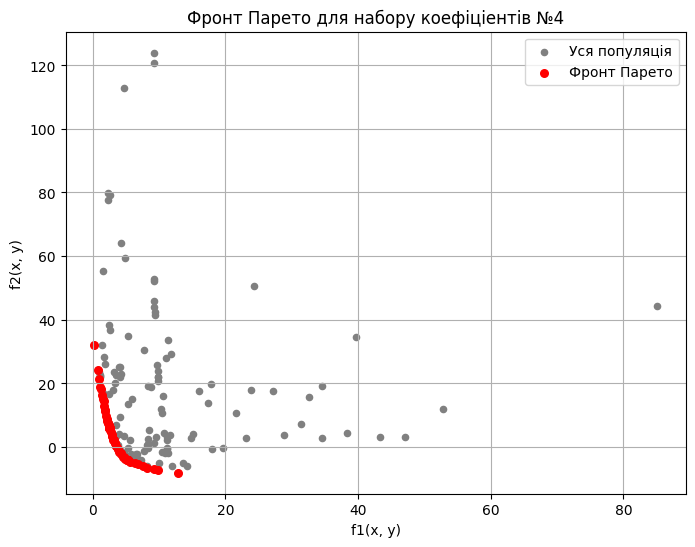

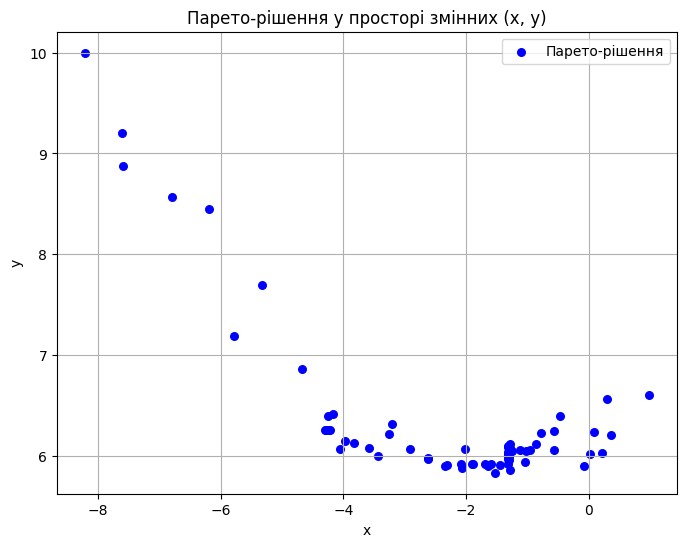

In [4]:
fitness4=[]
objectives4=[]
crossover_rate = 0.3        # Ймовірність кросоверу
mutation_rate = 0.6         # Ймовірність мутації
selection_rate = 0.1 
population4, pareto4, all_objs4 = multiobjective_genetic_algorithm(-10, 10)

# Фінальна оцінка і побудова фронту Парето
fitness4, objectives4 = evaluate_population(population4)

# Збираємо точки фронту Парето
pareto_front4 = []
pareto_coords4 = []

for i in range(len(fitness4)):
    if fitness4[i] == 0:
        pareto_front4.append(objectives4[i])       # (f1, f2)
        pareto_coords4.append(population4[i])      # (x, y)

# === Вивід точок фронту Парето: x, y, f1, f2 ===
print("=== Фронт Парето (x, y, f1, f2) ===")
for (x, y), (f1_val, f2_val) in zip(pareto_coords4, pareto_front4):
    print(f"x = {x:.4f}, y = {y:.4f}, f1 = {f1_val:.4f}, f2 = {f2_val:.4f}")

# === Формування таблиці з результатами фронту Парето ===
pareto_table4 = {
    "x": [x for x, y in pareto_coords4],
    "y": [y for x, y in pareto_coords4],
    "f1": [f1_val for f1_val, f2_val in pareto_front4],
    "f2": [f2_val for f1_val, f2_val in pareto_front4]
}

# === Створення DataFrame і збереження у файл Excel ===
df_pareto = pd.DataFrame(pareto_table4)
file_path = os.path.abspath("rez4.xlsx")
df_pareto.to_excel(file_path, index=False)
print(f"\nФайл збережено за шляхом: {file_path}")



# Візуалізація фронту Парето
pareto_front4 = np.array(pareto_front4)
all_objs4 = np.array(objectives4)

plt.figure(figsize=(8, 6))
plt.scatter(all_objs4[:, 0], all_objs4[:, 1], c='gray', s=20, label='Уся популяція')
plt.scatter(pareto_front4[:, 0], pareto_front4[:, 1], c='red', s=30, label='Фронт Парето')
plt.xlabel("f1(x, y)")
plt.ylabel("f2(x, y)")
plt.title("Фронт Парето для набору коефіціентів №4")
plt.legend()
plt.grid(True)
plt.show()
# Візуалізація Парето-рішень у просторі змінних (x, y) — без підписів
pareto_coords4 = np.array(pareto_coords4)

plt.figure(figsize=(8, 6))
plt.scatter(pareto_coords4[:, 0], pareto_coords4[:, 1], c='blue', s=30, label='Парето-рішення')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Парето-рішення у просторі змінних (x, y)")
plt.legend()
plt.grid(True)
plt.show()

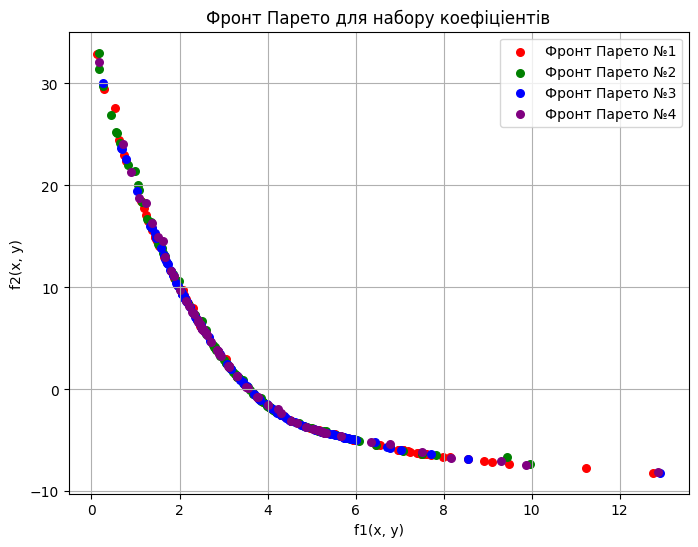

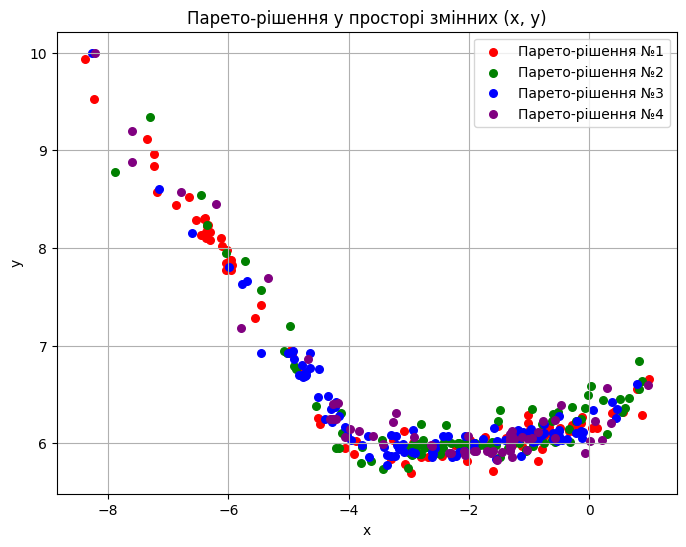

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(pareto_front1[:, 0], pareto_front1[:, 1], c='red', s=30, label='Фронт Парето №1')
plt.scatter(pareto_front2[:, 0], pareto_front2[:, 1], c='green', s=30, label='Фронт Парето №2')
plt.scatter(pareto_front3[:, 0], pareto_front3[:, 1], c='blue', s=30, label='Фронт Парето №3')
plt.scatter(pareto_front4[:, 0], pareto_front4[:, 1], c='purple', s=30, label='Фронт Парето №4')
plt.xlabel("f1(x, y)")
plt.ylabel("f2(x, y)")
plt.title("Фронт Парето для набору коефіціентів")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(pareto_coords1[:, 0], pareto_coords1[:, 1], c='red', s=30, label='Парето-рішення №1')
plt.scatter(pareto_coords2[:, 0], pareto_coords2[:, 1], c='green', s=30, label='Парето-рішення №2')
plt.scatter(pareto_coords3[:, 0], pareto_coords3[:, 1], c='blue', s=30, label='Парето-рішення №3')
plt.scatter(pareto_coords4[:, 0], pareto_coords4[:, 1], c='purple', s=30, label='Парето-рішення №4')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Парето-рішення у просторі змінних (x, y)")
plt.legend()
plt.grid(True)
plt.show()